In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
df = pd.read_csv('/kaggle/input/creditcard-data/Creditcard_data.csv')
display(df.head(20))
print(f"\n{df.shape}")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0



(772, 31)


Original Class Distribution:
Class
0    763
1      9
Name: count, dtype: int64


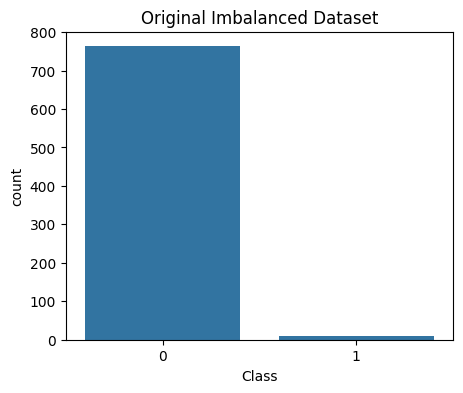

In [14]:
print("Original Class Distribution:")
print(df['Class'].value_counts())
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df)
plt.title("Original Imbalanced Dataset")
plt.show()

Before Oversampling:
Class
0    763
1      9
Name: count, dtype: int64

After Oversampling:
Class
0    763
1    763
Name: count, dtype: int64


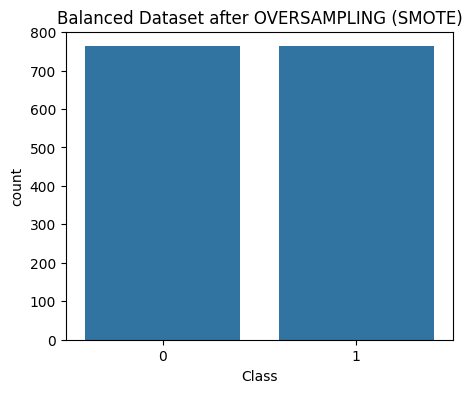

In [15]:
# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

print("Before Oversampling:")
print(y.value_counts())

# Apply SMOTE (create synthetic minority samples)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create new balanced dataframe
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Class'] = y_resampled

print("\nAfter Oversampling:")
print(df_balanced['Class'].value_counts())

# Visualize new balance
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df_balanced)
plt.title("Balanced Dataset after OVERSAMPLING (SMOTE)")
plt.show()

In [16]:
samples = []

for i in range(1,6):
    sample = df_balanced.sample(frac=0.8, random_state=i)  # 80% random sample
    samples.append(sample)
    print(f"Sample {i} shape: {sample.shape}")


Sample 1 shape: (1221, 31)
Sample 2 shape: (1221, 31)
Sample 3 shape: (1221, 31)
Sample 4 shape: (1221, 31)
Sample 5 shape: (1221, 31)


In [27]:
def random_sampling(df):
    return df.sample(frac=0.8, random_state=42)

def stratified_sampling(df):
    return df.groupby('Class', group_keys=False).apply(
        lambda x: x.sample(frac=0.8, random_state=42)
    )

def bootstrap_sampling(df):
    return df.sample(frac=1.0, replace=True, random_state=42)

def systematic_sampling(df):
    return df.iloc[::2]  # Take every 2nd row

def cluster_sampling_safe(df):
    df_temp = df.copy()
    df_temp['cluster'] = np.random.randint(0, 3, size=len(df_temp))

    chosen_cluster = np.random.choice(df_temp['cluster'].unique())
    cluster_sample = df_temp[df_temp['cluster'] == chosen_cluster]

    # Ensure at least two classes exist
    if cluster_sample['Class'].nunique() < 2:
        extra = df_temp[df_temp['Class'] != cluster_sample['Class'].iloc[0]].sample(50, random_state=42)
        cluster_sample = pd.concat([cluster_sample, extra])

    return cluster_sample.drop(columns=['cluster'])

sampling_methods = {
    "Random Sampling": random_sampling,
    "Stratified Sampling": stratified_sampling,
    "Bootstrap Sampling": bootstrap_sampling,
    "Systematic Sampling": systematic_sampling,
    "Cluster Sampling": cluster_sampling_safe
}


In [28]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "Naive Bayes": GaussianNB()
}


In [29]:
results = {}

for sample_idx, sample in enumerate(samples, start=1):
    print(f"TRAINING ON SAMPLE {sample_idx}")
    X = sample.drop(columns=['Class'])
    y = sample['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for s_name, s_func in sampling_methods.items():
        sampled_train = s_func(pd.concat([X_train, y_train], axis=1))
        X_train_s = sampled_train.drop(columns=['Class'])
        y_train_s = sampled_train['Class']

        for m_name, model in models.items():
            if y_train_s.nunique() < 2:
                print(f"⚠️ Skipping {m_name} for {s_name} (only one class in training data)")
                continue

            model.fit(X_train_s, y_train_s)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)

            key = f"Sample{sample_idx} | {s_name} | {m_name}"
            results[key] = acc

            print(f"{key} → Accuracy: {acc:.4f}")


TRAINING ON SAMPLE 1


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample1 | Random Sampling | Logistic Regression → Accuracy: 0.9210
Sample1 | Random Sampling | Decision Tree → Accuracy: 0.9837
Sample1 | Random Sampling | Random Forest → Accuracy: 0.9918
Sample1 | Random Sampling | SVM → Accuracy: 0.6785
Sample1 | Random Sampling | Naive Bayes → Accuracy: 0.8747


/tmp/ipykernel_55/1826043173.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Class', group_keys=False).apply(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample1 | Stratified Sampling | Logistic Regression → Accuracy: 0.9264
Sample1 | Stratified Sampling | Decision Tree → Accuracy: 0.9700
Sample1 | Stratified Sampling | Random Forest → Accuracy: 0.9973
Sample1 | Stratified Sampling | SVM → Accuracy: 0.6866
Sample1 | Stratified Sampling | Naive Bayes → Accuracy: 0.8856


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample1 | Bootstrap Sampling | Logistic Regression → Accuracy: 0.9455
Sample1 | Bootstrap Sampling | Decision Tree → Accuracy: 0.9619
Sample1 | Bootstrap Sampling | Random Forest → Accuracy: 0.9891
Sample1 | Bootstrap Sampling | SVM → Accuracy: 0.6839
Sample1 | Bootstrap Sampling | Naive Bayes → Accuracy: 0.8719


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample1 | Systematic Sampling | Logistic Regression → Accuracy: 0.9101
Sample1 | Systematic Sampling | Decision Tree → Accuracy: 0.9292
Sample1 | Systematic Sampling | Random Forest → Accuracy: 0.9891
Sample1 | Systematic Sampling | SVM → Accuracy: 0.6785
Sample1 | Systematic Sampling | Naive Bayes → Accuracy: 0.8828
Sample1 | Cluster Sampling | Logistic Regression → Accuracy: 0.9237
Sample1 | Cluster Sampling | Decision Tree → Accuracy: 0.9428
Sample1 | Cluster Sampling | Random Forest → Accuracy: 0.9918
Sample1 | Cluster Sampling | SVM → Accuracy: 0.6812
Sample1 | Cluster Sampling | Naive Bayes → Accuracy: 0.8202
TRAINING ON SAMPLE 2


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample2 | Random Sampling | Logistic Regression → Accuracy: 0.9373
Sample2 | Random Sampling | Decision Tree → Accuracy: 0.9864
Sample2 | Random Sampling | Random Forest → Accuracy: 0.9946
Sample2 | Random Sampling | SVM → Accuracy: 0.6921
Sample2 | Random Sampling | Naive Bayes → Accuracy: 0.8229


/tmp/ipykernel_55/1826043173.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Class', group_keys=False).apply(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample2 | Stratified Sampling | Logistic Regression → Accuracy: 0.9101
Sample2 | Stratified Sampling | Decision Tree → Accuracy: 0.9782
Sample2 | Stratified Sampling | Random Forest → Accuracy: 0.9918
Sample2 | Stratified Sampling | SVM → Accuracy: 0.6894
Sample2 | Stratified Sampling | Naive Bayes → Accuracy: 0.8093


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample2 | Bootstrap Sampling | Logistic Regression → Accuracy: 0.9128
Sample2 | Bootstrap Sampling | Decision Tree → Accuracy: 0.9809
Sample2 | Bootstrap Sampling | Random Forest → Accuracy: 0.9891
Sample2 | Bootstrap Sampling | SVM → Accuracy: 0.7302
Sample2 | Bootstrap Sampling | Naive Bayes → Accuracy: 0.8120


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample2 | Systematic Sampling | Logistic Regression → Accuracy: 0.9237
Sample2 | Systematic Sampling | Decision Tree → Accuracy: 0.9591
Sample2 | Systematic Sampling | Random Forest → Accuracy: 0.9864
Sample2 | Systematic Sampling | SVM → Accuracy: 0.6839
Sample2 | Systematic Sampling | Naive Bayes → Accuracy: 0.8120
Sample2 | Cluster Sampling | Logistic Regression → Accuracy: 0.9237
Sample2 | Cluster Sampling | Decision Tree → Accuracy: 0.9619


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample2 | Cluster Sampling | Random Forest → Accuracy: 0.9837
Sample2 | Cluster Sampling | SVM → Accuracy: 0.6757
Sample2 | Cluster Sampling | Naive Bayes → Accuracy: 0.8447
TRAINING ON SAMPLE 3


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample3 | Random Sampling | Logistic Regression → Accuracy: 0.9237
Sample3 | Random Sampling | Decision Tree → Accuracy: 0.9619
Sample3 | Random Sampling | Random Forest → Accuracy: 0.9864
Sample3 | Random Sampling | SVM → Accuracy: 0.6158
Sample3 | Random Sampling | Naive Bayes → Accuracy: 0.8338


/tmp/ipykernel_55/1826043173.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Class', group_keys=False).apply(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample3 | Stratified Sampling | Logistic Regression → Accuracy: 0.9237
Sample3 | Stratified Sampling | Decision Tree → Accuracy: 0.9646
Sample3 | Stratified Sampling | Random Forest → Accuracy: 0.9864
Sample3 | Stratified Sampling | SVM → Accuracy: 0.6076
Sample3 | Stratified Sampling | Naive Bayes → Accuracy: 0.8256


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample3 | Bootstrap Sampling | Logistic Regression → Accuracy: 0.9101
Sample3 | Bootstrap Sampling | Decision Tree → Accuracy: 0.9646
Sample3 | Bootstrap Sampling | Random Forest → Accuracy: 0.9918
Sample3 | Bootstrap Sampling | SVM → Accuracy: 0.6131
Sample3 | Bootstrap Sampling | Naive Bayes → Accuracy: 0.8093


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample3 | Systematic Sampling | Logistic Regression → Accuracy: 0.8937
Sample3 | Systematic Sampling | Decision Tree → Accuracy: 0.9619
Sample3 | Systematic Sampling | Random Forest → Accuracy: 0.9891
Sample3 | Systematic Sampling | SVM → Accuracy: 0.6022
Sample3 | Systematic Sampling | Naive Bayes → Accuracy: 0.8529
Sample3 | Cluster Sampling | Logistic Regression → Accuracy: 0.9373
Sample3 | Cluster Sampling | Decision Tree → Accuracy: 0.9428


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample3 | Cluster Sampling | Random Forest → Accuracy: 0.9891
Sample3 | Cluster Sampling | SVM → Accuracy: 0.6049
Sample3 | Cluster Sampling | Naive Bayes → Accuracy: 0.7984
TRAINING ON SAMPLE 4


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample4 | Random Sampling | Logistic Regression → Accuracy: 0.9074
Sample4 | Random Sampling | Decision Tree → Accuracy: 0.9728
Sample4 | Random Sampling | Random Forest → Accuracy: 0.9946
Sample4 | Random Sampling | SVM → Accuracy: 0.6621
Sample4 | Random Sampling | Naive Bayes → Accuracy: 0.8256


/tmp/ipykernel_55/1826043173.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Class', group_keys=False).apply(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample4 | Stratified Sampling | Logistic Regression → Accuracy: 0.8910
Sample4 | Stratified Sampling | Decision Tree → Accuracy: 0.9809
Sample4 | Stratified Sampling | Random Forest → Accuracy: 0.9946
Sample4 | Stratified Sampling | SVM → Accuracy: 0.6594
Sample4 | Stratified Sampling | Naive Bayes → Accuracy: 0.7875


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample4 | Bootstrap Sampling | Logistic Regression → Accuracy: 0.9183
Sample4 | Bootstrap Sampling | Decision Tree → Accuracy: 0.9619
Sample4 | Bootstrap Sampling | Random Forest → Accuracy: 0.9946
Sample4 | Bootstrap Sampling | SVM → Accuracy: 0.6540
Sample4 | Bootstrap Sampling | Naive Bayes → Accuracy: 0.8420
Sample4 | Systematic Sampling | Logistic Regression → Accuracy: 0.8856
Sample4 | Systematic Sampling | Decision Tree → Accuracy: 0.9564
Sample4 | Systematic Sampling | Random Forest → Accuracy: 0.9946
Sample4 | Systematic Sampling | SVM → Accuracy: 0.6676
Sample4 | Systematic Sampling | Naive Bayes → Accuracy: 0.7847
Sample4 | Cluster Sampling | Logistic Regression → Accuracy: 0.8747
Sample4 | Cluster Sampling | Decision Tree → Accuracy: 0.9292


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample4 | Cluster Sampling | Random Forest → Accuracy: 0.9864
Sample4 | Cluster Sampling | SVM → Accuracy: 0.6022
Sample4 | Cluster Sampling | Naive Bayes → Accuracy: 0.7411
TRAINING ON SAMPLE 5


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample5 | Random Sampling | Logistic Regression → Accuracy: 0.9046
Sample5 | Random Sampling | Decision Tree → Accuracy: 0.9755
Sample5 | Random Sampling | Random Forest → Accuracy: 0.9891
Sample5 | Random Sampling | SVM → Accuracy: 0.5995
Sample5 | Random Sampling | Naive Bayes → Accuracy: 0.8365


/tmp/ipykernel_55/1826043173.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Class', group_keys=False).apply(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample5 | Stratified Sampling | Logistic Regression → Accuracy: 0.9237
Sample5 | Stratified Sampling | Decision Tree → Accuracy: 0.9782
Sample5 | Stratified Sampling | Random Forest → Accuracy: 0.9891
Sample5 | Stratified Sampling | SVM → Accuracy: 0.6076
Sample5 | Stratified Sampling | Naive Bayes → Accuracy: 0.8065


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample5 | Bootstrap Sampling | Logistic Regression → Accuracy: 0.9264
Sample5 | Bootstrap Sampling | Decision Tree → Accuracy: 0.9728
Sample5 | Bootstrap Sampling | Random Forest → Accuracy: 0.9946
Sample5 | Bootstrap Sampling | SVM → Accuracy: 0.6185
Sample5 | Bootstrap Sampling | Naive Bayes → Accuracy: 0.8501
Sample5 | Systematic Sampling | Logistic Regression → Accuracy: 0.9155
Sample5 | Systematic Sampling | Decision Tree → Accuracy: 0.9346
Sample5 | Systematic Sampling | Random Forest → Accuracy: 0.9918
Sample5 | Systematic Sampling | SVM → Accuracy: 0.6076
Sample5 | Systematic Sampling | Naive Bayes → Accuracy: 0.7875
Sample5 | Cluster Sampling | Logistic Regression → Accuracy: 0.8937
Sample5 | Cluster Sampling | Decision Tree → Accuracy: 0.9292
Sample5 | Cluster Sampling | Random Forest → Accuracy: 0.9782
Sample5 | Cluster Sampling | SVM → Accuracy: 0.5995
Sample5 | Cluster Sampling | Naive Bayes → Accuracy: 0.8202


In [30]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

display(results_df.head(25))

,Accuracy
Sample1 | Stratified Sampling | Random Forest,0.997275
Sample2 | Random Sampling | Random Forest,0.994550
Sample4 | Stratified Sampling | Random Forest,0.994550
Sample4 | Systematic Sampling | Random Forest,0.994550
Sample4 | Bootstrap Sampling | Random Forest,0.994550
Sample4 | Random Sampling | Random Forest,0.994550
Sample5 | Bootstrap Sampling | Random Forest,0.994550
Sample3 | Bootstrap Sampling | Random Forest,0.991826
Sample5 | Systematic Sampling | Random Forest,0.991826
Sample1 | Cluster Sampling | Random Forest,0.991826


In [31]:
best_results = {}

for key, acc in results.items():
    parts = key.split(" | ")
    sampling = parts[1]
    model = parts[2]

    if model not in best_results or acc > best_results[model][1]:
        best_results[model] = (sampling, acc)

print("\nBEST SAMPLING")
for model, (sampling, acc) in best_results.items():
    print(f"{model}: Best → {sampling} with Accuracy = {acc:.4f}")


BEST SAMPLING
Logistic Regression: Best → Bootstrap Sampling with Accuracy = 0.9455
Decision Tree: Best → Random Sampling with Accuracy = 0.9864
Random Forest: Best → Stratified Sampling with Accuracy = 0.9973
SVM: Best → Bootstrap Sampling with Accuracy = 0.7302
Naive Bayes: Best → Stratified Sampling with Accuracy = 0.8856


In [32]:
print("\nReport(example):")
print(classification_report(y_test, y_pred))


Report(example):
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       192
           1       0.76      0.90      0.83       175

    accuracy                           0.82       367
   macro avg       0.83      0.82      0.82       367
weighted avg       0.83      0.82      0.82       367

